## 🛡️ Cybersecurity Track: AI-Driven Email Threat Detection and Alert System

### **Problem Statement**
Build an **AI-based tool** that detects and categorizes **phishing, spam, and malicious emails** using **Natural Language Processing (NLP)** and **header analysis**.

---

### **Key Features / Expectations**

- 🤖 **ML/NLP Model:** Classify email content as *Safe* or *Suspicious*.  
- ⚡ **Real-Time Alerts:** Instantly notify users upon detecting potential threats.  
- 📊 **Report Generation:** Generate detailed reports summarizing detected threats and trends.  
- 📁 **Dataset-Driven Training:** Use mock or publicly available datasets for model development.  
- 💌 **Optional Integration:** Connect with Gmail API or institutional mail servers for live monitoring.

---

### **Objective**
To develop a secure, scalable, and intelligent system that automates email threat detection and enhances organizational cybersecurity posture.



![My Local Image](WorkFlow.png)


In [1]:
import pandas as pd 
import numpy as np
import re
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
import torch
from urllib.parse import urlparse
import math

2025-10-30 11:21:46.292749: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-30 11:21:46.457733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-30 11:21:46.457853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-30 11:21:46.488339: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-30 11:21:46.559339: I tensorflow/core/platform/cpu_feature_guar

In [2]:
nigerian_fraud_extrime =  pd.read_csv("archive/Nigerian_Fraud.csv")
nazario_very_high =  pd.read_csv("archive/Nazario.csv")
ceas_08_Medium =  pd.read_csv("archive/CEAS_08.csv")
SpamAssasin_low =  pd.read_csv("archive/SpamAssasin.csv")

In [3]:
def fix_label(s,lable):
    if(s==1): return lable
    else : return 0

In [4]:
nigerian_fraud_extrime['label'] = nigerian_fraud_extrime['label'].map(lambda x: fix_label(x, 1))
nazario_very_high['label']     = nazario_very_high['label'].map(lambda x: fix_label(x, 2))
ceas_08_Medium['label']        = ceas_08_Medium['label'].map(lambda x: fix_label(x, 3))
SpamAssasin_low['label']       = SpamAssasin_low['label'].map(lambda x: fix_label(x, 4))

In [5]:
nigerian_fraud_extrime

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1
...,...,...,...,...,...,...,...
3327,michealagu0255@zipmail.com.br,NaN,NaN,CONTACT GLOBAL MAX SHIPING COMPANY,"Atten: My Dear ,\n \nI have Paid the fee for y...",0,1
3328,ali sherif <ali_sherif252@hotmail.fr>,NaN,"Mon, 17 Sep 2007 22:28:11 +0000",TREAT AS URGENT.,\nFrom: Mr Ali Sherif. African Development Ban...,1,1
3329,Dr Usman Ibrahim Danko <drusmanibrahimtg08@hot...,NaN,"Tue, 18 Sep 2007 10:54:53 +0000",From Dr Usman Ibrahim / Mr Wahid Yoffe property.,\nFROM DR USMAN IBRAHIM DANKO.AUDITING AND ACC...,1,1
3330,Mother Doris Killam <motherdorisk61@hotmail.com>,NaN,"Wed, 19 Sep 2007 00:52:16 +0100",My Beloved In Christ.,"\nBeloved in the Lord Jesus Christ, PLEASE END...",1,1


In [6]:
nazario_very_high

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,2
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,2
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,2
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,2
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,2
...,...,...,...,...,...,...,...
1560,info advantageapartments.com <info@advantageap...,"""jose@monkey.org"" <jose@monkey.org>","Sun, 11 Dec 2022 12:04:50 +0000",Receipt for Your Payment to FTX.,PayPal You sent a payment of $699.99 USD to FT...,0,2
1561,monkey.org <HELPDESK@monkey.org>,jose@monkey.org,15 Dec 2022 18:33:00 -0500,Rectify Your Password With monkey.org,"monkey.org Hi jose,Pa⁠s⁠sword for⁠ jose@monke...",1,2
1562,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,"Tue, 20 Dec 2022 23:00:27 +0000 (UTC)",Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,2
1563,MetaMask <info@sofamekar.com>,jose@monkey.org,27 Dec 2022 10:56:49 +0800,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,2


In [7]:
ceas_08_Medium_label = ceas_08_Medium['label']
ceas_08_Medium.drop(columns=['label'],inplace=True)
ceas_08_Medium['label'] = ceas_08_Medium_label
ceas_08_Medium

,sender,receiver,date,subject,body,urls,label
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,3
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,3
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,3
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,1,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,3
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,0,3
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,0,3
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [8]:
SpamAssasin_low_label = SpamAssasin_low['label']
SpamAssasin_low.drop(columns=['label'],inplace=True)
SpamAssasin_low['label'] = SpamAssasin_low_label
SpamAssasin_low

,sender,receiver,date,subject,body,urls,label
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",1,0
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",1,0
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,1,0
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,1,0
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",1,0
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,4
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,4
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,4
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,0,4


In [9]:
multi_label_spam = pd.concat([nigerian_fraud_extrime, nazario_very_high, ceas_08_Medium, SpamAssasin_low], axis=0, ignore_index=True,)
multi_label_spam

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1
...,...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,4
49856,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,4
49857,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,4
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,0,4


In [10]:
multi_label_spam['urls'].value_counts()

urls
1    33806
0    16054
Name: count, dtype: int64

In [11]:
def extract_all_url(urls_flag, text):
    if urls_flag != 1:
        return []
    if not isinstance(text, str) or not text.strip():
        return []

    # optional: fix common obfuscation like hxxp -> http
    text = re.sub(r'hxxp', 'http', text, flags=re.IGNORECASE)

    patterns = [
        r'href=[\'"]?([^\'" >]+)',   # capture href="..." or href='...'
        r'(?i)\b((?:https?://|http://|ftp://|ftps://|www\.)[^\s<>"\'\)\]]+)',  # full scheme or www
        r'(?i)\b((?:[a-z0-9\-]+\.)+[a-z]{2,}(?:/[^\s<>"\'\)\]]*)?)'  # bare domains like example.com[/path]
    ]

    found = []
    for pat in patterns:
        for match in re.findall(pat, text):
            u = match.strip()

            # Remove trailing punctuation often attached to URLs in plain text
            u = u.rstrip('.,;:)"\'<>]')

            # Skip plain emails accidentally matched
            if re.fullmatch(r'[\w\.-]+@[\w\.-]+', u):
                continue

            # Normalize www.* to include scheme for downstream consistency
            if u.lower().startswith('www.'):
                u = 'http://' + u

            # discard super short false positives
            if len(u) < 6:
                continue

            found.append(u)

    # preserve order and remove duplicates
    seen = set()
    results = []
    for u in found:
        if u not in seen:
            seen.add(u)
            results.append(u)

    return results




In [12]:
multi_label_spam['urls'] = multi_label_spam.apply(
    lambda row: extract_all_url(row['urls'], row['body']), 
    axis=1
)
multi_label_spam

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,[],1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",[],1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",[],1
...,...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,[http://images.pcdi-homestudy.com/ads/e277/uni...,4
49856,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,[http://www.insuranceiq.com/optout/],4
49857,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",[http://www.worldbizservices.net/your/mpam/mor...,4
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,[],4


In [13]:
multi_label_spam['urls']

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
49855    [http://images.pcdi-homestudy.com/ads/e277/uni...
49856                 [http://www.insuranceiq.com/optout/]
49857    [http://www.worldbizservices.net/your/mpam/mor...
49858                                                   []
49859    [http://www.linux.ie/mailman/listinfo/ilug, yo...
Name: urls, Length: 49860, dtype: object

In [14]:
# This counts the number of ROWS where the list in the 'urls' column has a length > 1
count_of_rows = (multi_label_spam['urls'].str.len() > 1).sum()

print(f"Number of rows with more than one URL: {count_of_rows}")

Number of rows with more than one URL: 29969


In [15]:
multi_label_spam.drop(columns=['date'],inplace=True)
multi_label_spam

,sender,receiver,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,[],1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",[],1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1
4,Maryam Abacha <m_abacha03@www.com>,R@M,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",[],1
...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,[http://images.pcdi-homestudy.com/ads/e277/uni...,4
49856,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,[http://www.insuranceiq.com/optout/],4
49857,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",[http://www.worldbizservices.net/your/mpam/mor...,4
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,[],4


In [16]:
def clean_sender(text):
    if not isinstance(text, str):
        return pd.Series(["", ""])
    
    # Extract email
    email_match = re.search(r'[\w\.-]+@[\w\.-]+\.\w+', text)
    email = email_match.group(0) if email_match else ""
    
    # Extract name (remove the email part, <>, and quotes)
    name = re.sub(r'<?[\w\.-]+@[\w\.-]+\.\w+>?', '', text)
    name = re.sub(r'[<>"]', '', name).strip()
    
    return pd.Series([name, email])


multi_label_spam[['sender_name', 'sender_email']] = multi_label_spam['sender'].apply(clean_sender)

In [17]:
def clean_receiver(text):
    if not isinstance(text, str):
        return ""
    # Extract clean email
    match = re.search(r'[\w\.-]+@[\w\.-]+\.\w+', text)
    return match.group(0) if match else text.strip('<>" ')

    
multi_label_spam['receiver_email'] = multi_label_spam['receiver'].apply(clean_receiver)

In [18]:
multi_label_spam.drop(columns=['sender', 'receiver'],inplace=True)
multi_label_spam

,subject,body,urls,label,sender_name,sender_email,receiver_email
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,[],1,MR. JAMES NGOLA.,james_ngola2002@maktoob.com,webmaster@aclweb.org
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",[],1,Mr. Ben Suleman,bensul2004nng@spinfinder.com,R@M
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org
3,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,[],1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org
4,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",[],1,Maryam Abacha,m_abacha03@www.com,R@M
...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,[http://images.pcdi-homestudy.com/ads/e277/uni...,4,,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com
49856,Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,[http://www.insuranceiq.com/optout/],4,IQ - TBA,tba@insiq.us,yyyy@spamassassin.taint.org
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",[http://www.worldbizservices.net/your/mpam/mor...,4,Mike,raye@yahoo.lv,Mailing.List@user2.pro-ns.net
49858,Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,[],4,Mr. Clean,cweqx@dialix.oz.au,Undisclosed.Recipients@webnote.net


In [19]:
def clean_body(text):
    """
    Cleans email body text:
    - Removes URLs (http, https, ftp, www)
    - Removes HTML tags (<...>)
    - Removes email addresses
    - Normalizes whitespace
    - Removes leftover brackets, quotes, etc.
    Returns cleaned plain text.
    """
    if not isinstance(text, str) or not text.strip():
        return ""

    # 1️⃣ Fix common obfuscations (e.g., hxxp → http)
    text = re.sub(r'hxxp', 'http', text, flags=re.IGNORECASE)

    # 2️⃣ Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.IGNORECASE)

    # 3️⃣ Remove HTML tags and entities
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'&[a-z]+;', ' ', text)

    # 4️⃣ Remove email addresses
    text = re.sub(r'[\w\.-]+@[\w\.-]+\.\w+', ' ', text)

    # 5️⃣ Remove non-alphanumeric noise
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', ' ', text)

    # 6️⃣ Normalize multiple spaces/newlines
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [20]:
multi_label_spam['body'] = multi_label_spam['body'].apply(clean_body)
multi_label_spam

,subject,body,urls,label,sender_name,sender_email,receiver_email
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM MR. JAMES NGOLA. CONFIDENTIAL TEL 233 27 ...,[],1,MR. JAMES NGOLA.,james_ngola2002@maktoob.com,webmaster@aclweb.org
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend, I am Mr. Ben Suleman a custom off...",[],1,Mr. Ben Suleman,bensul2004nng@spinfinder.com,R@M
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,[],1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org
3,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,[],1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org
4,I Need Your Assistance.,"Dear sir, It is with a heart full of hope that...",[],1,Maryam Abacha,m_abacha03@www.com,R@M
...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,! ! Train Now With Self Paced Home Study Thous...,[http://images.pcdi-homestudy.com/ads/e277/uni...,4,,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com
49856,Preferred Non-Smoker Rates for Smokers,This is a multi part message in MIME format. N...,[http://www.insuranceiq.com/optout/],4,IQ - TBA,tba@insiq.us,yyyy@spamassassin.taint.org
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber, If I could show you a way to ...",[http://www.worldbizservices.net/your/mpam/mor...,4,Mike,raye@yahoo.lv,Mailing.List@user2.pro-ns.net
49858,Cannabis Difference,Mid Summer Customer Appreciation SALE! To expr...,[],4,Mr. Clean,cweqx@dialix.oz.au,Undisclosed.Recipients@webnote.net


In [21]:
# def extract_numerical_feature_from_one_url(url_text):
#     lenght = len(url_text)
#     Character counts: The number of dots (.), dashes (-), slashes (/), question marks (?), and other special characters.
#     Character types: The count of digits and letters, or the ratio of uppercase to lowercase characters.
#     Suspicious keywords: Check for keywords like "login," "secure," or "confirm" in the URL, as these are often used in phishing scams.
#     Redirection: Count the number of // in the URL to detect if it has been redirected.
#     Prefix/suffix: Check for hyphens (-) in the domain, which are sometimes used to impersonate legitimate websites.

#     return all the 6 in numerical form 

# def extract_patterns_feature_from_one_url(url_text):
#     Presence of IP address: Check if the domain name is an IP address, which is often a sign of a fraudulent site.
#     URL shortening services: Use a regular expression to detect if a URL shortener was used. Phishers commonly use these to hide the true destination.
#     return all the 2 in bool formate 
        
# def extract_features_from_url(urls_list):
#     numerical = []
#     n=0
#     length,char_count, char_type, suspi_key_word, redirection, prefix_suffix=0
#     PresenceofIPaddress = False
#     URLshorteningservices =False
    
#     for url_text in urls_list:
#         # numerical = extract_numerical_feature_from_one_url(url_text)
#         length,char_count, char_type, suspi_key_word, redirection, prefix_suffix +=  extract_numerical_feature_from_one_url(url_text)
#         n+=1
#         PresenceofIPaddress, URLshorteningservices |= (or operation) extract_patterns_feature_from_one_url(url_text)

        
#     length,char_count, char_type, suspi_key_word, redirection, prefix_suffix /=n
#     return length,char_count, char_type, suspi_key_word, redirection, prefix_suffix, PresenceofIPaddress,URLshorteningservices
    
        
        
        
        
        
        
    
    

In [21]:

# suspicious keywords often seen in phishing URLs
_SUSPICIOUS_KEYWORDS = {
    "login", "secure", "confirm", "verify", "account", "signin", "bank",
    "update", "password", "wp-admin", "enter", "redirect", "auth"
}

# common URL shortener domains (non-exhaustive)
_URL_SHORTENERS = {
    "bit.ly", "t.co", "goo.gl", "tinyurl.com", "ow.ly", "buff.ly",
    "is.gd", "tiny.cc", "rebrand.ly", "shorturl.at", "adf.ly", "shorte.st",
    "rb.gy", "youtu.be"
}

_IPv4_RE = re.compile(r"^(?:\d{1,3}\.){3}\d{1,3}$")
_IPv6_RE = re.compile(r"^\[?[A-F0-9:]+\]?$", re.I)  # coarse check for colons

def extract_numerical_feature_from_one_url(url_text):
    """
    Returns a tuple of 6 numerical features for a single URL:
    (length,
     special_char_count,
     digits_to_letters_ratio,
     suspicious_keyword_count,
     redirection_count,   # extra '//' occurrences beyond the protocol
     hyphen_count_in_domain)
    """
    if not isinstance(url_text, str) or url_text.strip() == "":
        return (0, 0, 0.0, 0, 0, 0)

    u = url_text.strip()
    length = len(u)

    # Count special characters of interest (., -, /, ?, &, =, %, _, +, #, @)
    special_chars = r".-/?&=%_+#!:@"
    special_char_count = sum(u.count(ch) for ch in special_chars)

    # digits / letters ratio (add small epsilon to avoid division by zero)
    digits = sum(c.isdigit() for c in u)
    letters = sum(c.isalpha() for c in u)
    digits_to_letters_ratio = digits / (letters + 1e-9)

    # suspicious keyword count (word occurrences in the URL string)
    low = u.lower()
    suspicious_keyword_count = sum(low.count(k) for k in _SUSPICIOUS_KEYWORDS)

    # redirection count: count '//' appearances minus one for protocol (http(s)://)
    double_slash_count = low.count("//")
    redirection_count = max(0, double_slash_count - 1)

    # hyphen count in domain
    try:
        parsed = urlparse(u if "://" in u else "http://" + u)
        domain = parsed.netloc.lower()
    except Exception:
        domain = ""
    hyphen_count_in_domain = domain.count('-')

    return (length,
            special_char_count,
            digits_to_letters_ratio,
            suspicious_keyword_count,
            redirection_count,
            hyphen_count_in_domain)


def extract_patterns_feature_from_one_url(url_text):
    """
    Returns a tuple of two booleans:
    (presence_of_ip_address, url_shortening_service_detected)
    """
    if not isinstance(url_text, str) or url_text.strip() == "":
        return (False, False)

    u = url_text.strip()
    # extract domain/netloc robustly
    try:
        parsed = urlparse(u if "://" in u else "http://" + u)
        domain = parsed.netloc.lower()
        # if port present remove it
        domain = domain.split(":")[0]
    except Exception:
        domain = ""

    # check IPv4 or IPv6
    is_ipv4 = bool(_IPv4_RE.match(domain))
    is_ipv6 = False
    # IPv6 often appears in brackets like [::1] or contains many colons
    if ":" in domain:
        # basic check for IPv6 (coarse)
        is_ipv6 = bool(_IPv6_RE.match(domain))

    presence_of_ip_address = is_ipv4 or is_ipv6

    # URL shortener: check domain against known shorteners
    # also treat very short domain names (2-4 chars) as suspicious shorteners optionally
    domain_only = domain.lower()
    url_shorteningservices = False
    if domain_only in _URL_SHORTENERS:
        url_shorteningservices = True
    else:
        # also detect common shortener patterns: single-letter domain + path like x.co or yb.me etc.
        # we'll flag domains shorter than or equal to 4 chars (excluding TLD) as suspicious if path is present
        if domain_only:
            # split subdomain+domain (keep last two labels if possible)
            labels = domain_only.split('.')
            # domain label before tld can be second-last element
            if len(labels) >= 2:
                name_label = labels[-2]
            else:
                name_label = labels[0]
            if len(name_label) <= 4:
                # consider it suspicious shortener only if path exists in URL
                parsed = urlparse(u if "://" in u else "http://" + u)
                if parsed.path and parsed.path.strip() not in ("/", ""):
                    url_shorteningservices = True

    return (presence_of_ip_address, url_shorteningservices)


def extract_url_features(urls_list):
    """
    urls_list: either
      - a Python list of URL strings, or
      - a single URL string
    Returns aggregated features:
      (avg_length,
       avg_special_char_count,
       avg_digits_to_letters_ratio,
       avg_suspicious_keyword_count,
       avg_redirection_count,
       avg_hyphen_count_in_domain,
       presence_of_ip_address_any,      # bool
       url_shorteningservice_any)       # bool
    Suitable for use with: df['urls'].apply(extract_url_features)
    """
    # Normalize input to list
    if urls_list is None:
        urls = []
    elif isinstance(urls_list, str):
        # treat single URL string as single-element list
        urls = [urls_list]
    else:
        # assume iterable of strings
        try:
            urls = list(urls_list)
        except Exception:
            urls = [str(urls_list)]

    if len(urls) == 0:
        # return zeros + falses
        return (0, 0, 0.0, 0, 0, 0, False, False)

    # accumulators
    accum = [0.0] * 6
    presence_ip = False
    shortening = False
    count = 0

    for u in urls:
        if u is None:
            continue
        # skip empty strings
        if isinstance(u, float) and math.isnan(u):
            continue
        if isinstance(u, str) and u.strip() == "":
            continue

        num_feats = extract_numerical_feature_from_one_url(u)
        pat_feats = extract_patterns_feature_from_one_url(u)

        for i in range(6):
            accum[i] += float(num_feats[i])

        presence_ip = presence_ip or bool(pat_feats[0])
        shortening = shortening or bool(pat_feats[1])

        count += 1

    if count == 0:
        return (0, 0, 0.0, 0, 0, 0, False, False)

    # average numeric features
    avg_feats = [acc / count for acc in accum]

    return (
        avg_feats[0],                     # avg length
        avg_feats[1],                     # avg special char count
        avg_feats[2],                     # avg digits_to_letters_ratio
        avg_feats[3],                     # avg suspicious keyword count
        avg_feats[4],                     # avg redirection count
        avg_feats[5],                     # avg hyphen count in domain
        presence_ip,                      # any IP address present across URLs
        shortening                        # any shortener detected across URLs
    )

# -------------------------
# Example usage (your original code)
# -------------------------


url_feats = multi_label_spam['urls'].apply(extract_url_features)
url_feats_df = pd.DataFrame(url_feats.tolist(), index=multi_label_spam.index)
# url_feats_df.columns = {
#     0: 'avg_url_length',
#     1: 'avg_special_char_count',
#     2: 'avg_digits_to_letters_ratio',
#     3: 'avg_suspicious_keyword_count',
#     4: 'avg_redirection_count',
#     5: 'avg_hyphen_count_in_domain',
#     6: 'presence_of_ip_address_any',
#     7: 'url_shorteningservice_any'
# }
# url_feats_df.rename(columns=url_feats_df)
multi_label_spam = pd.concat([multi_label_spam, url_feats_df], axis=1)
multi_label_spam.drop(columns=['urls'], inplace=True)
#
# If you want column names:

multi_label_spam

,subject,body,label,sender_name,sender_email,receiver_email,0,1,2,3,4,5,6,7
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM MR. JAMES NGOLA. CONFIDENTIAL TEL 233 27 ...,1,MR. JAMES NGOLA.,james_ngola2002@maktoob.com,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend, I am Mr. Ben Suleman a custom off...",1,Mr. Ben Suleman,bensul2004nng@spinfinder.com,R@M,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False
3,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,obong_715@epatra.com,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False
4,I Need Your Assistance.,"Dear sir, It is with a heart full of hope that...",1,Maryam Abacha,m_abacha03@www.com,R@M,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,! ! Train Now With Self Paced Home Study Thous...,4,,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,49.384615,8.307692,0.076624,0.000000,0.0,0.461538,False,True
49856,Preferred Non-Smoker Rates for Smokers,This is a multi part message in MIME format. N...,4,IQ - TBA,tba@insiq.us,yyyy@spamassassin.taint.org,34.000000,7.000000,0.000000,0.000000,0.0,0.000000,False,False
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber, If I could show you a way to ...",4,Mike,raye@yahoo.lv,Mailing.List@user2.pro-ns.net,37.250000,5.250000,0.000000,0.000000,0.0,0.000000,False,False
49858,Cannabis Difference,Mid Summer Customer Appreciation SALE! To expr...,4,Mr. Clean,cweqx@dialix.oz.au,Undisclosed.Recipients@webnote.net,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False


In [23]:
# multi_label_spam['presence_of_ip_address_any'] = multi_label_spam['presence_of_ip_address_any'].map(lambda x: 1 if x else 0)
# multi_label_spam['url_shorteningservice_any'] = multi_label_spam['url_shorteningservice_any'].map(lambda x: 1 if x else 0)

In [22]:
import re
import math
from collections import Counter

FREE_PROVIDERS = {
    "gmail.com", "yahoo.com", "hotmail.com", "outlook.com",
    "icloud.com", "protonmail.com", "mail.com", "zoho.com", "aol.com"
}

SUSPICIOUS_KEYWORDS = {"admin","support","secure","login","verify","bank","update","noreply","service","help"}

_ipv4_re = re.compile(r"^(?:\d{1,3}\.){3}\d{1,3}$")
_email_re = re.compile(r"^(?P<local>[^@]+)@(?P<domain>[^@]+\.[^@]+)$")

def shannon_entropy(s: str) -> float:
    if not s:
        return 0.0
    counts = Counter(s)
    length = len(s)
    return -sum((cnt/length) * math.log2(cnt/length) for cnt in counts.values())

def extract_sender_email_features(email: str):
    """
    Extract offline features from the sender email address (no network lookups).
    Returns a dict whose keys are prefixed with 'sender_email_' so they can be
    concatenated directly into the original dataframe without further renaming.
    """
    prefix = "sender_email_"
    feats = {
        prefix + "len_email": 0,
        prefix + "len_local": 0,
        prefix + "len_domain": 0,
        prefix + "num_dots_domain": 0,
        prefix + "num_subdomains": 0,
        prefix + "num_special_local": 0,
        prefix + "num_digits_local": 0,
        prefix + "num_digits_domain": 0,
        prefix + "ratio_digits_letters_local": 0.0,
        prefix + "has_plus": False,
        prefix + "has_dot_in_local": False,
        prefix + "domain_is_ip": False,
        prefix + "is_free_provider": False,
        prefix + "has_suspicious_keyword_local": False,
        prefix + "local_entropy": 0.0,
        prefix + "domain_entropy": 0.0,
        prefix + "tld": None
    }

    if not isinstance(email, str) or email.strip() == "":
        return feats

    email = email.strip()
    feats[prefix + "len_email"] = len(email)

    m = _email_re.match(email)
    if not m:
        local = email
        domain = ""
    else:
        local = m.group("local")
        domain = m.group("domain").lower()

    feats[prefix + "len_local"] = len(local)
    feats[prefix + "len_domain"] = len(domain)
    feats[prefix + "num_dots_domain"] = domain.count(".")
    feats[prefix + "num_subdomains"] = len(domain.split(".")) if domain else 0

    special_local = sum(1 for c in local if not c.isalnum())
    digits_local = sum(c.isdigit() for c in local)
    letters_local = sum(c.isalpha() for c in local)
    digits_domain = sum(c.isdigit() for c in domain)

    feats[prefix + "num_special_local"] = special_local
    feats[prefix + "num_digits_local"] = digits_local
    feats[prefix + "num_digits_domain"] = digits_domain
    feats[prefix + "ratio_digits_letters_local"] = digits_local / (letters_local + 1e-9)

    feats[prefix + "has_plus"] = "+" in local
    feats[prefix + "has_dot_in_local"] = "." in local

    low_local = local.lower()
    feats[prefix + "has_suspicious_keyword_local"] = any(k in low_local for k in SUSPICIOUS_KEYWORDS)

    feats[prefix + "local_entropy"] = shannon_entropy(local)
    feats[prefix + "domain_entropy"] = shannon_entropy(domain)

    domain_only = domain.split(":")[0]  # remove port if present
    feats[prefix + "domain_is_ip"] = bool(_ipv4_re.match(domain_only))
    feats[prefix + "is_free_provider"] = domain_only in FREE_PROVIDERS

    if "." in domain_only:
        feats[prefix + "tld"] = domain_only.split(".")[-1]
    else:
        feats[prefix + "tld"] = domain_only if domain_only else None

    return feats



feats = multi_label_spam['sender_email'].apply(extract_sender_email_features)
feats_df = pd.DataFrame(feats.tolist(), index=multi_label_spam.index)
multi_label_spam = pd.concat([multi_label_spam, feats_df], axis=1)
multi_label_spam.drop(columns=['sender_email'], inplace=True)
multi_label_spam

,subject,body,label,sender_name,receiver_email,0,1,2,3,4,...,sender_email_num_digits_domain,sender_email_ratio_digits_letters_local,sender_email_has_plus,sender_email_has_dot_in_local,sender_email_domain_is_ip,sender_email_is_free_provider,sender_email_has_suspicious_keyword_local,sender_email_local_entropy,sender_email_domain_entropy,sender_email_tld
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM MR. JAMES NGOLA. CONFIDENTIAL TEL 233 27 ...,1,MR. JAMES NGOLA.,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.400000,False,False,False,False,False,3.506891,2.845351,com
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend, I am Mr. Ben Suleman a custom off...",1,Mr. Ben Suleman,R@M,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.444444,False,False,False,False,False,3.180833,3.521641,com
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.600000,False,False,False,False,False,2.947703,3.121928,com
3,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,webmaster@aclweb.org,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.600000,False,False,False,False,False,2.947703,3.121928,com
4,I Need Your Assistance.,"Dear sir, It is with a heart full of hope that...",1,Maryam Abacha,R@M,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.285714,False,False,False,False,False,2.846439,2.128085,com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,! ! Train Now With Self Paced Home Study Thous...,4,,yyyy@netnoteinc.com,49.384615,8.307692,0.076624,0.000000,0.0,...,0,0.000000,False,False,False,False,False,3.956920,3.546594,com
49856,Preferred Non-Smoker Rates for Smokers,This is a multi part message in MIME format. N...,4,IQ - TBA,yyyy@spamassassin.taint.org,34.000000,7.000000,0.000000,0.000000,0.0,...,0,0.000000,False,False,False,False,False,1.584963,2.500000,us
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber, If I could show you a way to ...",4,Mike,Mailing.List@user2.pro-ns.net,37.250000,5.250000,0.000000,0.000000,0.0,...,0,0.000000,False,False,False,False,False,2.000000,2.750000,lv
49858,Cannabis Difference,Mid Summer Customer Appreciation SALE! To expr...,4,Mr. Clean,Undisclosed.Recipients@webnote.net,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0.000000,False,False,False,False,False,2.321928,3.084963,au


In [23]:
import re
import math
from collections import Counter

FREE_PROVIDERS = {
    "gmail.com", "yahoo.com", "hotmail.com", "outlook.com",
    "icloud.com", "protonmail.com", "mail.com", "zoho.com", "aol.com"
}

SUSPICIOUS_KEYWORDS = {"admin","support","secure","login","verify","bank","update","noreply","service","help"}

_ipv4_re = re.compile(r"^(?:\d{1,3}\.){3}\d{1,3}$")
_email_re = re.compile(r"^(?P<local>[^@]+)@(?P<domain>[^@]+\.[^@]+)$")

def shannon_entropy(s: str) -> float:
    if not s:
        return 0.0
    counts = Counter(s)
    length = len(s)
    return -sum((cnt/length) * math.log2(cnt/length) for cnt in counts.values())

def extract_receiver_email_features(email: str):
    """
    Extract offline features from the receiver email address (no network lookups).
    Returns a dict whose keys are prefixed with 'receiver_email_'.
    """
    prefix = "receiver_email_"
    feats = {
        prefix + "len_email": 0,
        prefix + "len_local": 0,
        prefix + "len_domain": 0,
        prefix + "num_dots_domain": 0,
        prefix + "num_subdomains": 0,
        prefix + "num_special_local": 0,
        prefix + "num_digits_local": 0,
        prefix + "num_digits_domain": 0,
        prefix + "ratio_digits_letters_local": 0.0,
        prefix + "has_plus": False,
        prefix + "has_dot_in_local": False,
        prefix + "domain_is_ip": False,
        prefix + "is_free_provider": False,
        prefix + "has_suspicious_keyword_local": False,
        prefix + "local_entropy": 0.0,
        prefix + "domain_entropy": 0.0,
        prefix + "tld": None
    }

    if not isinstance(email, str) or email.strip() == "":
        return feats

    email = email.strip()
    feats[prefix + "len_email"] = len(email)

    m = _email_re.match(email)
    if not m:
        local = email
        domain = ""
    else:
        local = m.group("local")
        domain = m.group("domain").lower()

    feats[prefix + "len_local"] = len(local)
    feats[prefix + "len_domain"] = len(domain)
    feats[prefix + "num_dots_domain"] = domain.count(".")
    feats[prefix + "num_subdomains"] = len(domain.split(".")) if domain else 0

    special_local = sum(1 for c in local if not c.isalnum())
    digits_local = sum(c.isdigit() for c in local)
    letters_local = sum(c.isalpha() for c in local)
    digits_domain = sum(c.isdigit() for c in domain)

    feats[prefix + "num_special_local"] = special_local
    feats[prefix + "num_digits_local"] = digits_local
    feats[prefix + "num_digits_domain"] = digits_domain
    feats[prefix + "ratio_digits_letters_local"] = digits_local / (letters_local + 1e-9)

    feats[prefix + "has_plus"] = "+" in local
    feats[prefix + "has_dot_in_local"] = "." in local

    low_local = local.lower()
    feats[prefix + "has_suspicious_keyword_local"] = any(k in low_local for k in SUSPICIOUS_KEYWORDS)

    feats[prefix + "local_entropy"] = shannon_entropy(local)
    feats[prefix + "domain_entropy"] = shannon_entropy(domain)

    domain_only = domain.split(":")[0]
    feats[prefix + "domain_is_ip"] = bool(_ipv4_re.match(domain_only))
    feats[prefix + "is_free_provider"] = domain_only in FREE_PROVIDERS

    if "." in domain_only:
        feats[prefix + "tld"] = domain_only.split(".")[-1]
    else:
        feats[prefix + "tld"] = domain_only if domain_only else None

    return feats




receiver_feats = multi_label_spam['receiver_email'].apply(extract_receiver_email_features)
receiver_feats_df = pd.DataFrame(receiver_feats.tolist(), index=multi_label_spam.index)
multi_label_spam = pd.concat([multi_label_spam, receiver_feats_df], axis=1)
multi_label_spam.drop(columns=['receiver_email'], inplace=True)
multi_label_spam

,subject,body,label,sender_name,0,1,2,3,4,5,...,receiver_email_num_digits_domain,receiver_email_ratio_digits_letters_local,receiver_email_has_plus,receiver_email_has_dot_in_local,receiver_email_domain_is_ip,receiver_email_is_free_provider,receiver_email_has_suspicious_keyword_local,receiver_email_local_entropy,receiver_email_domain_entropy,receiver_email_tld
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM MR. JAMES NGOLA. CONFIDENTIAL TEL 233 27 ...,1,MR. JAMES NGOLA.,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,2.947703,3.321928,org
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend, I am Mr. Ben Suleman a custom off...",1,Mr. Ben Suleman,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,1.584963,0.000000,None
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,2.947703,3.321928,org
3,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY HRM CROWN RULER OF ELEM...,1,PRINCE OBONG ELEME,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,2.947703,3.321928,org
4,I Need Your Assistance.,"Dear sir, It is with a heart full of hope that...",1,Maryam Abacha,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,1.584963,0.000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,! ! Train Now With Self Paced Home Study Thous...,4,,49.384615,8.307692,0.076624,0.000000,0.0,0.461538,...,0,0.0,False,False,False,False,False,-0.000000,2.896292,com
49856,Preferred Non-Smoker Rates for Smokers,This is a multi part message in MIME format. N...,4,IQ - TBA,34.000000,7.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,False,False,False,False,-0.000000,3.204448,org
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber, If I could show you a way to ...",4,Mike,37.250000,5.250000,0.000000,0.000000,0.0,0.000000,...,1,0.0,False,True,False,False,False,3.188722,3.375000,net
49858,Cannabis Difference,Mid Summer Customer Appreciation SALE! To expr...,4,Mr. Clean,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,False,True,False,False,False,3.538311,2.663533,net


In [24]:
def concat_all_text(sender_name, subject, body):
    sender_name = str(sender_name) if pd.notna(sender_name) else ""
    subject = str(subject) if pd.notna(subject) else ""
    body = str(body) if pd.notna(body) else ""
    return f"{sender_name} {subject} {body}".strip()

multi_label_spam['text'] = multi_label_spam.apply(
    lambda row: concat_all_text(row['sender_name'], row['subject'], row['body']),
    axis=1
)

multi_label_spam.drop(columns=['sender_name', 'subject', 'body'], inplace=True)
multi_label_spam


,label,0,1,2,3,4,5,6,7,sender_email_len_email,...,receiver_email_ratio_digits_letters_local,receiver_email_has_plus,receiver_email_has_dot_in_local,receiver_email_domain_is_ip,receiver_email_is_free_provider,receiver_email_has_suspicious_keyword_local,receiver_email_local_entropy,receiver_email_domain_entropy,receiver_email_tld,text
0,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,27,...,0.0,False,False,False,False,False,2.947703,3.321928,org,MR. JAMES NGOLA. URGENT BUSINESS ASSISTANCE AN...
1,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,28,...,0.0,False,False,False,False,False,1.584963,0.000000,None,Mr. Ben Suleman URGENT ASSISTANCE /RELATIONSHI...
2,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,...,0.0,False,False,False,False,False,2.947703,3.321928,org,PRINCE OBONG ELEME GOOD DAY TO YOU FROM HIS RO...
3,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,...,0.0,False,False,False,False,False,2.947703,3.321928,org,PRINCE OBONG ELEME GOOD DAY TO YOU FROM HIS RO...
4,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,...,0.0,False,False,False,False,False,1.584963,0.000000,None,Maryam Abacha I Need Your Assistance. Dear sir...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,4,49.384615,8.307692,0.076624,0.000000,0.0,0.461538,False,True,55,...,0.0,False,False,False,False,False,-0.000000,2.896292,com,Busy? Home Study Makes Sense! ! ! Train Now Wi...
49856,4,34.000000,7.000000,0.000000,0.000000,0.0,0.000000,False,False,12,...,0.0,False,False,False,False,False,-0.000000,3.204448,org,IQ - TBA Preferred Non-Smoker Rates for Smoker...
49857,4,37.250000,5.250000,0.000000,0.000000,0.0,0.000000,False,False,13,...,0.0,False,True,False,False,False,3.188722,3.375000,net,"Mike How to get 10,000 FREE hits per day to an..."
49858,4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,...,0.0,False,True,False,False,False,3.538311,2.663533,net,Mr. Clean Cannabis Difference Mid Summer Custo...


In [25]:

# Load model on GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
base_model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

def do_text_embedding(text: str):
    if not isinstance(text, str) or text.strip() == "":
        return np.zeros(base_model.get_sentence_embedding_dimension())
    emb = base_model.encode(text, convert_to_numpy=True, device=device)
    emb = normalize(emb.reshape(1, -1))[0]
    return emb

print("Applying text embedding transformation on", device, "...")

text_embeddings = base_model.encode(
    multi_label_spam['text'].tolist(),
    convert_to_numpy=True,
    show_progress_bar=True,
    device=device
)

# text_embeddings = normalize(text_embeddings)
text_feats_df = pd.DataFrame(text_embeddings, index=multi_label_spam.index)
multi_label_spam = pd.concat([multi_label_spam.drop(columns=['text']), text_feats_df], axis=1)

multi_label_spam


Applying text embedding transformation on cuda ...


Batches:   0%|          | 0/1559 [00:00<?, ?it/s]

,label,0,1,2,3,4,5,6,7,sender_email_len_email,...,374,375,376,377,378,379,380,381,382,383
0,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,27,...,0.081948,-0.067885,-0.030746,0.069836,-0.024736,0.026522,-0.033671,-0.108357,-0.069525,-0.056629
1,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,28,...,0.066993,-0.038219,-0.052946,0.004095,-0.038412,0.027102,-0.035605,-0.088092,-0.043493,-0.004891
2,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,...,0.026973,-0.039289,-0.068165,0.068555,-0.076403,-0.027183,0.035612,-0.059531,-0.006359,-0.007364
3,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,...,0.026973,-0.039289,-0.068165,0.068555,-0.076403,-0.027183,0.035612,-0.059531,-0.006359,-0.007364
4,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,...,0.013574,-0.057932,-0.052193,0.013279,0.012014,0.036626,0.060126,-0.046407,-0.033413,-0.020974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,4,49.384615,8.307692,0.076624,0.000000,0.0,0.461538,False,True,55,...,0.048357,0.107271,0.053403,-0.011452,-0.069690,0.122611,0.011980,-0.089098,-0.023512,0.013281
49856,4,34.000000,7.000000,0.000000,0.000000,0.0,0.000000,False,False,12,...,-0.059643,0.013039,0.014361,0.049157,-0.011259,-0.015796,0.032170,0.001085,-0.026202,0.021989
49857,4,37.250000,5.250000,0.000000,0.000000,0.0,0.000000,False,False,13,...,0.038542,0.079541,0.030299,-0.001739,0.006090,0.153975,0.013177,-0.111165,-0.090425,0.000641
49858,4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,...,-0.052533,-0.017075,0.007821,-0.014499,-0.033856,-0.109313,0.053838,-0.054159,0.045369,-0.038983


In [26]:
# Convert string columns to categorical dtype and then to numeric codes
for col in ['sender_email_tld', 'receiver_email_tld']:
    multi_label_spam[col] = multi_label_spam[col].astype('category').cat.codes

multi_label_spam[['sender_email_tld', 'receiver_email_tld']]

,sender_email_tld,receiver_email_tld
0,41,72
1,41,-1
2,41,72
3,41,72
4,41,-1
...,...,...
49855,41,19
49856,183,72
49857,106,65
49858,11,65


In [27]:
multi_label_spam['sender_email_tld'].value_counts()

sender_email_tld
 41     24303
 132     6199
 124     4394
 48      2310
-1       1354
        ...  
 157        1
 110        1
 109        1
 125        1
 162        1
Name: count, Length: 195, dtype: int64

In [28]:
multi_label_spam['receiver_email_tld'].value_counts()

receiver_email_tld
 13    23819
 72    10443
 19     5405
-1      3237
 65     2359
       ...  
 67        1
 59        1
 36        1
 27        1
 22        1
Name: count, Length: 101, dtype: int64

In [29]:
X,y = multi_label_spam.drop(columns=['label']), multi_label_spam['label']
X

,0,1,2,3,4,5,6,7,sender_email_len_email,sender_email_len_local,...,374,375,376,377,378,379,380,381,382,383
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,27,15,...,0.081948,-0.067885,-0.030746,0.069836,-0.024736,0.026522,-0.033671,-0.108357,-0.069525,-0.056629
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,28,13,...,0.066993,-0.038219,-0.052946,0.004095,-0.038412,0.027102,-0.035605,-0.088092,-0.043493,-0.004891
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,9,...,0.026973,-0.039289,-0.068165,0.068555,-0.076403,-0.027183,0.035612,-0.059531,-0.006359,-0.007364
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,20,9,...,0.026973,-0.039289,-0.068165,0.068555,-0.076403,-0.027183,0.035612,-0.059531,-0.006359,-0.007364
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,10,...,0.013574,-0.057932,-0.052193,0.013279,0.012014,0.036626,0.060126,-0.046407,-0.033413,-0.020974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,49.384615,8.307692,0.076624,0.000000,0.0,0.461538,False,True,55,41,...,0.048357,0.107271,0.053403,-0.011452,-0.069690,0.122611,0.011980,-0.089098,-0.023512,0.013281
49856,34.000000,7.000000,0.000000,0.000000,0.0,0.000000,False,False,12,3,...,-0.059643,0.013039,0.014361,0.049157,-0.011259,-0.015796,0.032170,0.001085,-0.026202,0.021989
49857,37.250000,5.250000,0.000000,0.000000,0.0,0.000000,False,False,13,4,...,0.038542,0.079541,0.030299,-0.001739,0.006090,0.153975,0.013177,-0.111165,-0.090425,0.000641
49858,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,False,18,5,...,-0.052533,-0.017075,0.007821,-0.014499,-0.033856,-0.109313,0.053838,-0.054159,0.045369,-0.038983


In [30]:
# Get all columns of type object
object_cols = X.columns[X.dtypes == 'object']

# Print them
print("Columns with object dtype:")
print(object_cols.tolist())


Columns with object dtype:
[]


In [31]:
X = pd.DataFrame(
    normalize(X.values, axis=1), 
    columns=X.columns,
    index=X.index
)
X

,0,1,2,3,4,5,6,7,sender_email_len_email,sender_email_len_local,...,374,375,376,377,378,379,380,381,382,383
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.291330,0.161850,...,0.000884,-0.000732,-0.000332,0.000754,-0.000267,0.000286,-0.000363,-0.001169,-0.000750,-0.000611
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.520196,0.241519,...,0.001245,-0.000710,-0.000984,0.000076,-0.000714,0.000504,-0.000661,-0.001637,-0.000808,-0.000091
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.222407,0.100083,...,0.000300,-0.000437,-0.000758,0.000762,-0.000850,-0.000302,0.000396,-0.000662,-0.000071,-0.000082
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.222407,0.100083,...,0.000300,-0.000437,-0.000758,0.000762,-0.000850,-0.000302,0.000396,-0.000662,-0.000071,-0.000082
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.383742,0.213190,...,0.000289,-0.001235,-0.001113,0.000283,0.000256,0.000781,0.001282,-0.000989,-0.000712,-0.000447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,0.492476,0.082847,0.000764,0.000000,0.0,0.004603,0.0,0.009972,0.548475,0.408863,...,0.000482,0.001070,0.000533,-0.000114,-0.000695,0.001223,0.000119,-0.000889,-0.000234,0.000132
49856,0.167178,0.034419,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.059004,0.014751,...,-0.000293,0.000064,0.000071,0.000242,-0.000055,-0.000078,0.000158,0.000005,-0.000129,0.000108
49857,0.274452,0.038681,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.095782,0.029471,...,0.000284,0.000586,0.000223,-0.000013,0.000045,0.001134,0.000097,-0.000819,-0.000666,0.000005
49858,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.220639,0.061288,...,-0.000644,-0.000209,0.000096,-0.000178,-0.000415,-0.001340,0.000660,-0.000664,0.000556,-0.000478


In [32]:
# If they are DataFrames, convert to Series
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]
y

0        1
1        1
2        1
3        1
4        1
        ..
49855    4
49856    4
49857    4
49858    4
49859    4
Name: label, Length: 49860, dtype: int64

In [33]:
# Identify problematic columns in X_train
bad_cols = [c for c in X.columns if X[c].apply(lambda v: isinstance(v, (list, np.ndarray))).any()]
print("Columns with list/array values:", bad_cols)

print("\nData types summary:")
print(X.dtypes.value_counts())


Columns with list/array values: []

Data types summary:
float64    426
Name: count, dtype: int64


In [34]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42, stratify=y
)

xgb_model = XGBClassifier(
    tree_method='hist',              # Changed from 'gpu_hist'
    predictor='cpu_predictor',       # Changed from 'gpu_predictor'
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)
xgb_model.fit(X_train,y_train,eval_set=[(X_test, y_test)])


/home/harshit-gupta/miniconda3/envs/tfenv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:03] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.40230
[1]	validation_0-mlogloss:1.24033
[2]	validation_0-mlogloss:1.10580
[3]	validation_0-mlogloss:0.99550
[4]	validation_0-mlogloss:0.89983
[5]	validation_0-mlogloss:0.81667
[6]	validation_0-mlogloss:0.74440
[7]	validation_0-mlogloss:0.68052
[8]	validation_0-mlogloss:0.62414
[9]	validation_0-mlogloss:0.57421
[10]	validation_0-mlogloss:0.52942
[11]	validation_0-mlogloss:0.48946
[12]	validation_0-mlogloss:0.45350
[13]	validation_0-mlogloss:0.42101
[14]	validation_0-mlogloss:0.39098
[15]	validation_0-mlogloss:0.36420
[16]	validation_0-mlogloss:0.33947
[17]	validation_0-mlogloss:0.31726
[18]	validation_0-mlogloss:0.29719
[19]	validation_0-mlogloss:0.27889
[20]	validation_0-mlogloss:0.26197
[21]	validation_0-mlogloss:0.24647
[22]	validation_0-mlogloss:0.23246
[23]	validation_0-mlogloss:0.21948
[24]	validation_0-mlogloss:0.20755
[25]	validation_0-mlogloss:0.19674
[26]	validation_0-mlogloss:0.18673
[27]	validation_0-mlogloss:0.17779
[28]	validation_0-mlogloss:0.1

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [37]:
import xgboost as xgb
print(xgb.__version__)
print(xgb.build_info())

2.1.1
{'BUILTIN_PREFETCH_PRESENT': True, 'DEBUG': False, 'GCC_VERSION': [11, 2, 0], 'MM_PREFETCH_PRESENT': True, 'USE_CUDA': False, 'USE_DLOPEN_NCCL': False, 'USE_FEDERATED': False, 'USE_NCCL': False, 'USE_OPENMP': True, 'USE_RMM': False, 'libxgboost': '/home/harshit-gupta/miniconda3/envs/tfenv/lib/libxgboost.so'}


In [35]:
y_pred = xgb_model.predict(X_test)
y_pred

array([3, 3, 0, ..., 3, 4, 0])

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4281
           1       0.97      0.99      0.98       666
           2       0.99      0.97      0.98       313
           3       0.99      1.00      1.00      4368
           4       0.96      0.81      0.87       344

    accuracy                           0.99      9972
   macro avg       0.98      0.95      0.96      9972
weighted avg       0.99      0.99      0.99      9972

--- Individual Metrics (Weighted Avg) ---
Accuracy: 0.9875
Weighted Precision: 0.9873
Weighted Recall: 0.9875
Weighted F1-Score: 0.9871

--- Confusion Matrix ---
Raw Confusion Matrix:
[[4255    1    1   20    4]
 [   4  657    1    1    3]
 [   5    3  303    0    2]
 [   8    1    0 4355    4]
 [  46   15    1    5  277]]


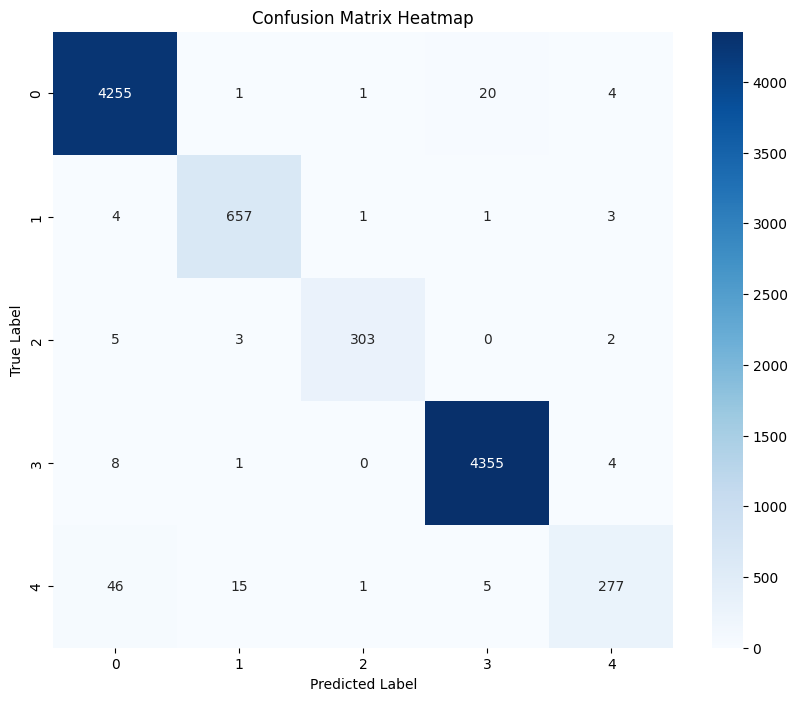

In [36]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Assume y_test and y_pred are already available ---
# y_test = ... (Your true labels)
# y_pred = ... (Your model's predictions)

# 1. Get the full report (Precision, Recall, F1, Accuracy)
print("--- Classification Report ---")
# This is the fastest way to see all key metrics.
# If you have your class names (e.g., from your LabelEncoder, like encoder.classes_),
# you can pass them with target_names=encoder.classes_ for a nicer printout.
print(classification_report(y_test, y_pred))

# 2. Get individual metrics
# For multiclass classification, you must specify an 'average' method.
# 'weighted' is recommended as it accounts for label imbalance.
print("--- Individual Metrics (Weighted Avg) ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Weighted Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-Score: {f1:.4f}")

# 3. Get the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print("Raw Confusion Matrix:")
print(cm)

# Optional: Plot a heatmap for the confusion matrix
# This is highly recommended as the raw matrix is hard to read.
try:
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
except ImportError:
    print("\nInstall seaborn and matplotlib to plot the confusion matrix heatmap:")
    print("pip install seaborn matplotlib")